# Omurga rahatsızlığını belirlemek için kullanılan bazı değerler ile regresyon

In [12]:
#Gerekli kütüphaneleri import etmek

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [13]:
df=pd.read_csv("2s_vaka.csv")
df

pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
0           63.027818            22.552586              39.609117   
1           39.056951            10.060991              25.015378   
2           68.832021            22.218482              50.092194   
3           69.297008            24.652878              44.311238   
4           49.712859             9.652075              28.317406   
..                ...                  ...                    ...   
305         47.903565            13.616688              36.000000   
306         53.936748            20.721496              29.220534   
307         61.446597            22.694968              46.170347   
308         45.252792             8.693157              41.583126   
309         33.841641             5.073991              36.641233   

     sacral_slope  pelvic_radius  degree_spondylolisthesis     class  
0       40.475232      98.672917                 -0.254400  Abnormal  
1       28.995960     114.405425                  4.564259  Abnormal  
2       46.613539     105.985135                 -3.530317  Abnormal  
3       44.644130     101.868495                 11.211523  Abnormal  
4       40.060784     108.168725                  7.918501  Abnormal  
..            ...            ...                       ...       ...  
305     34.286877     117.449062                 -4.245395    Normal  
306     33.215251     114.365845                 -0.421010    Normal  
307     38.751628     125.670725                 -2.707880    Normal  
308     36.559635     118.545842                  0.214750    Normal  
309     28.767649     123.945244                 -0.199249    Normal  

[310 rows x 7 columns]

# Dataset hakkında bilgi

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [15]:
df.describe()

pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
count        310.000000           310.000000             310.000000   
mean          60.496653            17.542822              51.930930   
std           17.236520            10.008330              18.554064   
min           26.147921            -6.554948              14.000000   
25%           46.430294            10.667069              37.000000   
50%           58.691038            16.357689              49.562398   
75%           72.877696            22.120395              63.000000   
max          129.834041            49.431864             125.742385   

       sacral_slope  pelvic_radius  degree_spondylolisthesis  
count    310.000000     310.000000                310.000000  
mean      42.953831     117.920655                 26.296694  
std       13.423102      13.317377                 37.559027  
min       13.366931      70.082575                -11.058179  
25%       33.347122     110.709196                  1.603727  
50%       42.404912     118.268178                 11.767934  
75%       52.695888     125.467674                 41.287352  
max      121.429566     163.071041                418.543082

# Eksik Değerlerin Kontrolü

In [16]:
eksik = df.isnull().sum()


eksik_tablo = pd.DataFrame({"Eksik Değer Sayısı" : eksik})

eksik_tablo

Eksik Değer Sayısı
pelvic_incidence                           0
pelvic_tilt numeric                        0
lumbar_lordosis_angle                      0
sacral_slope                               0
pelvic_radius                              0
degree_spondylolisthesis                   0
class                                      0

In [17]:
df.duplicated().sum()

0

# Normalizasyon

In [18]:
dfScaler = df.loc[:,"pelvic_incidence":"degree_spondylolisthesis"]
N = (dfScaler - np.min(dfScaler))/(np.max(dfScaler)-np.min(dfScaler))
print(N)

     pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
0            0.355688             0.519900               0.229180   
1            0.124501             0.296783               0.098578   
2            0.411666             0.513932               0.322995   
3            0.416151             0.557414               0.271260   
4            0.227272             0.289479               0.128129   
..                ...                  ...                    ...   
305          0.209822             0.360293               0.196881   
306          0.268009             0.487194               0.136211   
307          0.340438             0.522443               0.287897   
308          0.184257             0.272352               0.246846   
309          0.074202             0.207709               0.202620   

     sacral_slope  pelvic_radius  degree_spondylolisthesis  
0        0.250857       0.307461                  0.025148  
1        0.144629       0.476649                 

# Veri Setini Bağımlı ve Bağımsız Niteliklere Ayırmak

In [38]:
x=df.iloc[:,0:2].values
y=df.iloc[:,2:3].values

# Desicion Tree, Random Forest, MLR, PLR

In [20]:
tree_reg=DecisionTreeRegressor()
tree_reg.fit(x,y)

tree_pred=tree_reg.predict(x)
print("tree r2:",r2_score(y,tree_pred))
print("mae:",mean_absolute_error(y,tree_pred))

tree r2: 1.0
mae: 0.0


In [21]:
mlr=LinearRegression()
mlr.fit(x,y)
mlr_pred=mlr.predict(x)
print("mlr","r2",r2_score(y,mlr_pred))
print("mae:",mean_absolute_error(y,mlr_pred))
print(mlr.intercept_,mlr.coef_)
print(mlr.score(x,y))

mlr r2 0.5150635517427291
mae: 9.554782230525996
[4.96129015] [[ 0.79290725 -0.05692331]]
0.5150635517427291


Lineer Regresyonun Grafiğin Çizdirilmesi

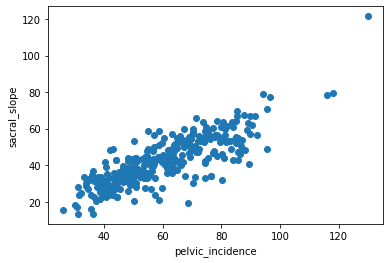

In [30]:
array = np.array([40,50,60,70,80,90,100,120]).reshape(-1,1)
plt.scatter(x,y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

In [25]:
rf=RandomForestRegressor(n_estimators=10,random_state=42)
rf.fit(x,y.ravel())
rf_pred=rf.predict(x)
print("rf","r2",r2_score(y,rf_pred))
print("mae:",mean_absolute_error(y,rf_pred))

rf r2 0.8923536150879137
mae: 4.124580610141936


In [26]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

mlr=LinearRegression()
mlr.fit(x_train,y_train)
mlr_pred=mlr.predict(x_test)

tree_reg=DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train,y_train)
tree_pred=tree_reg.predict(x_test)

rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train.ravel())
rf_pred=rf.predict(x_test)


#değerlendirme
print("mlr","r2",r2_score(y_test,mlr_pred),"mae:",mean_absolute_error(y_test,mlr_pred))
print("dt","r2",r2_score(y_test,tree_pred),"mae:",mean_absolute_error(y_test,tree_pred))
print("rf","r2",r2_score(y_test,rf_pred),"mae:",mean_absolute_error(y_test,rf_pred))
print("mse değeri:",mean_squared_error(y_test,mlr_pred))
print("rmse değeri:",mean_squared_error(y_test,mlr_pred)**0,5)

mlr r2 0.4579682868895395 mae: 10.805994561168488
dt r2 0.14582271047740436 mae: 14.04629963048387
rf r2 0.44439989720823236 mae: 11.28168692961129
mse değeri: 239.49320916720455
rmse değeri: 1.0 5


# Polynomial linear regression

In [27]:
from sklearn.preprocessing import PolynomialFeatures

plr=PolynomialFeatures(degree=2)
X_pol=plr.fit_transform(x)


x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
lr_pol=LinearRegression()
lr_pol.fit(x_train,y_train)

print(lr_pol.intercept_,lr_pol.coef_)

[5.24579042] [[ 0.79845725 -0.10955578]]
